In [7]:
import numpy as np
import matplotlib.pyplot as plt

import sys

# sys.path.append(".")
from ex4_utils import kalman_step


In [22]:
import sympy as sp
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False)
def neki(F,L,C):
    F = sp.Matrix(F)
    T = sp.symbols('T')
    A = sp.exp(F*T)

    q = sp.symbols('q')
    L = sp.Matrix(L)
    Q = sp.integrate( (A*L)*q*(A*L).T, (T, 0, T) )
    
    
    C = sp.Matrix(C)
    
    r = sp.symbols('r')
    R = r*sp.Matrix([[1,0],[0,1]])
    
    alpha, beta, height, width = sp.symbols('a, b, h, w')
    V = sp.Matrix([[alpha*width,0,0,0],
                   [0,alpha*height,0,0],
                   [0,0,beta*width,0],
                   [0,0,0,beta*height]])
    
    V
    
    return F, A, L, Q, C, R, V, T, q, r


In [67]:
def snippet(A,C,Q_i,R_i, plot=True, mode = "default"):
    if mode == "default":
        N=40
        v=np.linspace(5*np.pi,0,N)
        x=np.cos(v)*v
        y=np.sin(v)*v
    elif mode == "downup":
        x = np.array([1,1,1,2,3,4,4,4])
        y = np.array([1,2,3,3,3,3,4,5])
    elif mode == "back":
        x = np.array([0,0,0,0,0,0,0,0,0,0.5,1,1,1,1,1,1,1,1,1])
        y = np.array([1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4,3,2,1])

    sx=np.zeros((x.size,1),dtype=np.float32).flatten()
    sy=np.zeros((y.size,1),dtype=np.float32).flatten()

    sx[0]=x[0]
    sy[0]=y[0]

    state=np.zeros((A.shape[0],1),dtype=np.float32).flatten()
    print(state.shape)

    state[0]=x[0]
    state[1]=y[0]

    covariance=np.eye(A.shape[0],dtype=np.float32)
    for j in range(1,x.size):
        state,covariance,_,_= kalman_step(A,C,Q_i,R_i,np.reshape(np.array([x[j],y[j]]),(-1,1)),np.reshape(state,(-1,1)),covariance)
        sx[j]=state[0]
        sy[j]=state[1]
    if plot:
        plt.plot(x,y)
        plt.plot(sx,sy)
    return x,y, sx, sy
    
def run_snippet(A,C,Q,R, T, q, r, T_val = 1, q_val = 1, r_val = 1,plot=False,snippet_mode="default"):
    A = np.array(A.subs(T,T_val),dtype=np.float32)
    C = np.array(C,dtype=np.float32)
    Q = np.array(Q.subs(T, T_val).subs(q,q_val),dtype=np.float32)
    R = np.array(R.subs(r,r_val),dtype=np.float32)
    return snippet(A,C,Q,R,plot=plot,mode=snippet_mode)

(6,)


/tmp/ipykernel_5745/2015005837.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j]=state[0]
/tmp/ipykernel_5745/2015005837.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j]=state[1]


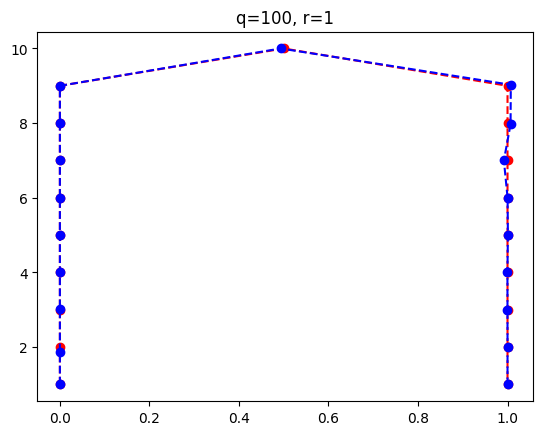

(6,)


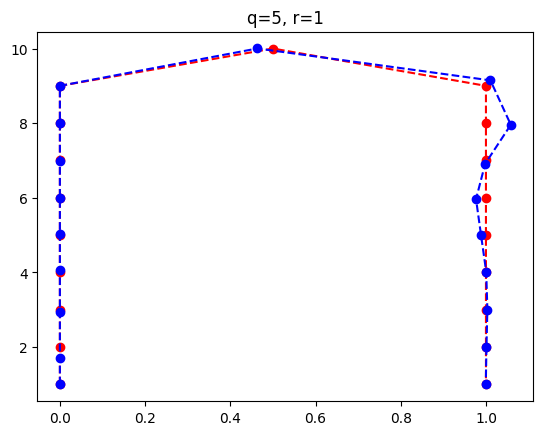

(6,)


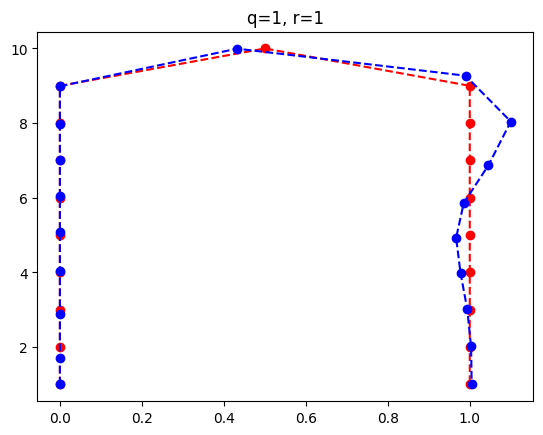

(6,)


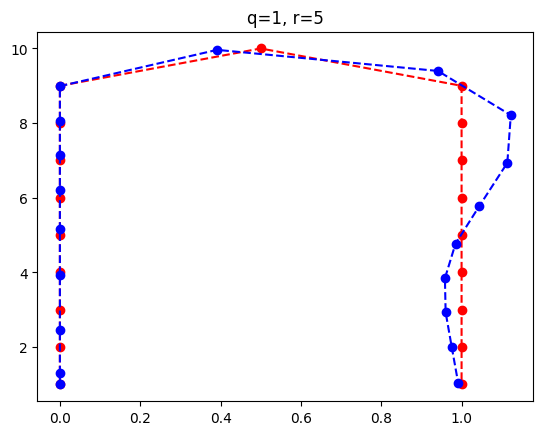

(6,)


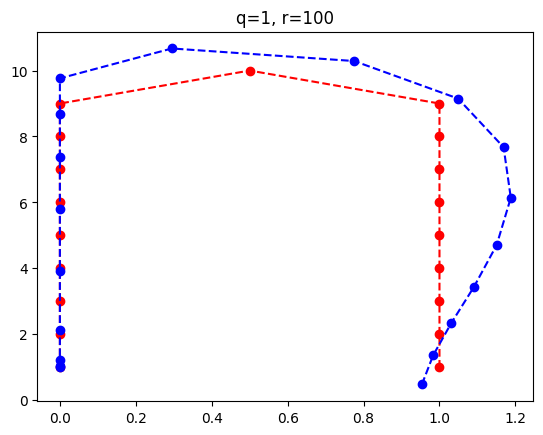

In [70]:
# RW
mode = "NCA"
if mode == "RW":
    F, A, L, Q, C, R, V, T, q, r = neki(F = [[0,0],[0,0]],
                                L = [[1,0],[0,1]],
                                C = [[1,0],[0,1]])
elif mode == "NCV":
    F, A, L, Q, C, R, V, T, q, r = neki(F = [[0,0,1,0],
                                [0,0,0,1],
                                [0,0,0,0],
                                [0,0,0,0]],
                            L = [[0, 0],[0, 0],[1, 0],[0, 1]],
                            C = [[1,0,0,0],[0,1,0,0]]
                           )
elif mode == "NCA":
    F, A, L, Q, C, R, V, T, q, r = neki(F = [[0,0,1,0,0,0],
                                         [0,0,0,1,0,0],
                                         [0,0,0,0,1,0],
                                         [0,0,0,0,0,1],
                                         [0,0,0,0,0,0],
                                         [0,0,0,0,0,0]],
                                    L = [[0,0],[0,0],[0,0],[0,0],[1,0],[0,1]],
                            C = [[1,0,0,0,0,0],[0,1,0,0,0,0]]
                           )
for q_val,r_val in [(100,1),(5,1),(1,1),(1,5),(1,100)]:
    x,y, sx, sy = run_snippet(A,C,Q,R, T, q, r, T_val = 1, q_val = q_val, r_val = r_val,plot=False,snippet_mode="back")
    plt.plot(x,y,"--o",c="r")
    plt.plot(sx,sy,"--o",c="b")
    plt.title(f"q={q_val}, r={r_val}")
    # plt.savefig(f"{mode}_q_{q_val}_r_{r_val}.png")
    plt.show()


(4,)


/tmp/ipykernel_5745/687352936.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j]=state[0]
/tmp/ipykernel_5745/687352936.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j]=state[1]


(array([-15.707963  , -14.568714  , -11.14826   ,  -5.9360676 ,
          0.03792176,   5.7630515 ,  10.294902  ,  12.949241  ,
         13.404366  ,  11.720573  ,   8.300904  ,   3.8025577 ,
         -0.98596454,  -5.281381  ,  -8.433188  , -10.021634  ,
         -9.911305  ,  -8.253805  ,  -5.4420853 ,  -2.027132  ,
          1.386369  ,   4.246116  ,   6.141544  ,   6.8619914 ,
          6.415585  ,   5.008181  ,   2.9889128 ,   0.77448356,
         -1.2324903 ,  -2.7156327 ,  -3.4946682 ,  -3.5451381 ,
         -2.9862752 ,  -2.0415459 ,  -0.9814383 ,  -0.06108053,
          0.5342685 ,   0.724944  ,   0.5471255 ,   0.13637291],
       dtype=float32),
 array([ 9.6183539e-15,  4.1993876e+00,  9.8438692e+00,  1.3801115e+01,
         1.5040006e+01,  1.3578598e+01,  9.9356279e+00,  4.9147229e+00,
        -5.6652367e-01, -5.6050096e+00, -9.4331179e+00, -1.1524722e+01,
        -1.1664145e+01, -9.9631338e+00, -6.8229914e+00, -2.8504467e+00,
         1.2559323e+00,  4.8276167e+00,  7.33499

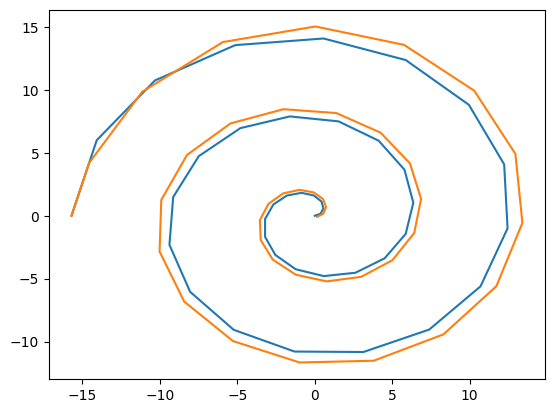

In [44]:
# NCV
F, A, L, Q, C, R, V, T, q, r = neki(F = [[0,0,1,0],
                                [0,0,0,1],
                                [0,0,0,0],
                                [0,0,0,0]],
                            L = [[0, 0],[0, 0],[1, 0],[0, 1]],
                            C = [[1,0,0,0],[0,1,0,0]]
                           )

run_snippet(A,C,Q,R, T, q, r, T_val = 1, q_val = 1, r_val = 1)

(6,)


/tmp/ipykernel_5745/687352936.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j]=state[0]
/tmp/ipykernel_5745/687352936.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j]=state[1]


(array([-15.707963  , -14.573646  , -10.861282  ,  -5.2756124 ,
          0.77302086,   6.2514358 ,  10.345097  ,  12.53824   ,
         12.632111  ,  10.750305  ,   7.311719  ,   2.9571831 ,
         -1.5624633 ,  -5.5157437 ,  -8.311214  ,  -9.587085  ,
         -9.255806  ,  -7.4991403 ,  -4.718104  ,  -1.4494228 ,
          1.7350435 ,   4.3275642 ,   5.9654384 ,   6.4806695 ,
          5.9117904 ,   4.4783435 ,   2.5251873 ,   0.44882742,
         -1.379471  ,  -2.6793387 ,  -3.3042152 ,  -3.2549675 ,
         -2.6636057 ,  -1.7522919 ,  -0.7773749 ,   0.02931953,
          0.50972193,   0.60945207,   0.3829206 ,  -0.02664141],
       dtype=float32),
 array([ 9.61835388e-15,  4.18120861e+00,  1.02552252e+01,  1.41413040e+01,
         1.48415985e+01,  1.27990046e+01,  8.83212471e+00,  3.83327794e+00,
        -1.35643482e+00, -5.96779776e+00, -9.35191441e+00, -1.10628977e+01,
        -1.09328623e+01, -9.09934998e+00, -5.97134733e+00, -2.14418483e+00,
         1.71427083e+00,  4.9815

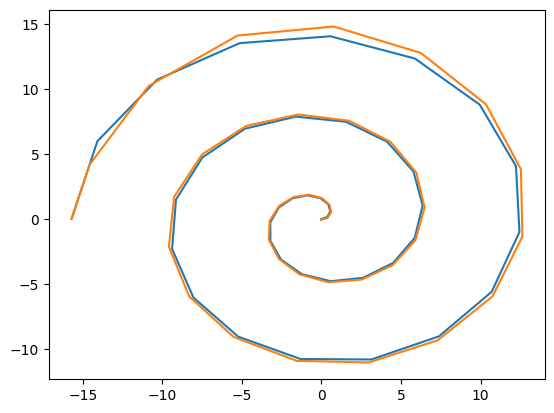

In [45]:
# NCA
F, A, L, Q, C, R, V, T, q, r = neki(F = [[0,0,1,0,0,0],
                                         [0,0,0,1,0,0],
                                         [0,0,0,0,1,0],
                                         [0,0,0,0,0,1],
                                         [0,0,0,0,0,0],
                                         [0,0,0,0,0,0]],
                                    L = [[0,0],[0,0],[0,0],[0,0],[1,0],[0,1]],
                            C = [[1,0,0,0,0,0],[0,1,0,0,0,0]]
                           )

run_snippet(A,C,Q,R, T, q, r, T_val = 1, q_val = 1, r_val = 1)